<div style="background-color: #d4edda;">

# **Problem Statement and Explanation**  </div>


## **Problem Statement**

The goal of this project is to develop and compare different reinforcement learning (RL) algorithms to find the most efficient delivery route for a Swiggy agent within a simulated grid-world environment. The agent's objective is to collect orders from a restaurant and deliver them to multiple customers while navigating various obstacles and optimizing for speed and rewards.



## **Explanation of the Context and Environment**  

**Grid-world Representation**  
The environment is an **8x8 grid** that represents a simplified city map.  
- Each cell corresponds to a state.  
- The grid includes **a restaurant, multiple customers, traffic zones, and roadblocks**.  
- The agent’s position is defined by its **(row, col)** coordinates.  

**Agent and State**  
- The agent is the **Swiggy delivery person**.  
- A state = agent’s **position (row, col)** + set of **customers already delivered to**.  
- This ensures the agent knows which customers are still pending.  

**Actions**  
- The agent can move in **four directions**: `up`, `down`, `left`, `right`.  
- Moves are restricted by **grid boundaries** and **roadblocks**.  

**Rewards**  
The environment provides structured rewards to guide optimal delivery behavior:  

    - 'step': -0.1,         # Your REWARD_STEP
    - 'traffic': -2.0,        # Your REWARD_TRAFFIC
    - 'roadblock': -10.0,     # Your REWARD_BLOCK
    - 'pickup': 5.0,          # Positive reward for reaching a restaurant
    - 'delivery': 20.0,       # Positive reward for a successful delivery
    - 'bad_delivery': -20.0,  # Penalty for attempting delivery without pickup
    - 'final_goal': 10.0      # Your REWARD_MULTIPLE as a final completion bonus


This setup forms the **foundation for reinforcement learning algorithms** (Dynamic Programming, Monte Carlo, Q-Learning, SARSA) to discover the **optimal delivery policy** in a realistic urban gridworld.



<div style="background-color: #d4edda;">

# **Transition Diagram**  </div>

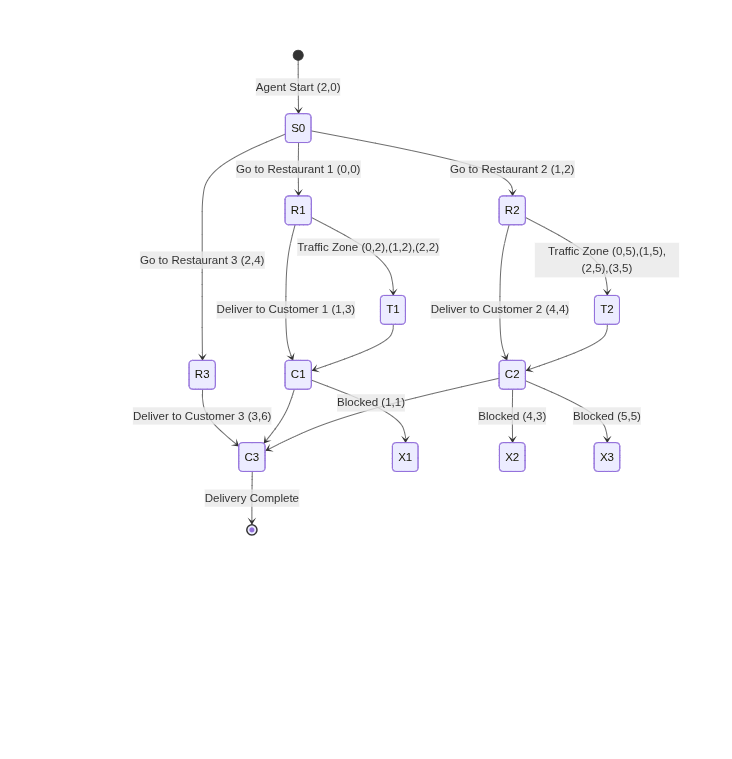

**Explanation of Transition Diagram**

- Starting Point: The diagram begins with the agent at a starting position, denoted as "Agent Start (2,0)". This is the initial state from which the agent's journey begins.

- Restaurant Options: From the starting state, the agent has three possible actions: to go to Restaurant 1 at (0,0), Restaurant 2 at (1,2), or Restaurant 3 at (2,4). This represents a choice the agent must make based on its learned policy.

- Traffic Zones: The diagram illustrates that certain paths, specifically when traveling from a restaurant to a customer, may involve "Traffic Zones." For example, the path from Restaurant 1 to Customer 1 includes traffic at locations (0,2), (1,2), and (2,2). Similarly, the path from Restaurant 2 to Customer 2 has a traffic zone at (0,5), (1,5), (2,5), and (3,5).

- Blocked Paths: The diagram clearly shows "Blocked" zones, which are impassable and prevent the agent from taking a direct route. Examples include a blocked path at (1,1) between Customer 1 and Customer 3, and blocked paths at (4,3) and (5,5) near Customer 2.

- Delivery Completion: The agent's goal is to successfully deliver to all three customers (C1, C2, and C3). Once all deliveries are complete, the agent reaches the "Delivery Complete" state, which is the terminal state of the process.

<div style="background-color: #d4edda;">

# **Grid-World Representation**  </div>

**Explanation of the Visualization Code**

1. Configuration and Styling: The first section of the code sets up the entire environment in a clean, centralized way.

- We define the GRID_SIZE so we can easily change the map's dimensions later.

- The STYLE_MAP dictionary acts like a stylesheet. It separates the visual properties (colors, emojis) from the main logic. This makes it easy to change the look of the grid without rewriting the drawing code.

- The grid_elements dictionary is the core map data. It uses coordinates (row, col) as keys to define the exact location of every important element, like restaurants, customers, and obstacles.

2. The Plotting Function (create_grid_world): This is the main engine that draws the grid. It takes the configuration we defined and turns it into a visual plot.

- It starts by creating a plot "canvas" using matplotlib.

- It then loops through every cell of the grid, from (0,0) to (7,7).

- For each cell, it checks our grid_elements dictionary. If the cell is special (e.g., a customer), it uses a Rectangle patch to draw the appropriate background color from our STYLE_MAP.

- Finally, it places the text label and emoji in the center of the colored square.

3. Aesthetic Adjustments: After drawing all the cells, this part cleans up the plot to make it look professional.

- It inverts the y-axis to place coordinate (0,0) in the standard top-left position.

- It creates a custom legend by generating proxy Patch objects. This allows us to have a clean, readable legend that explains what each color and icon means.

- It places this legend outside the grid to avoid clutter and adds a title.

Execution: The final line simply calls the main function, passing all our configuration data to it to generate and display the final grid world image.

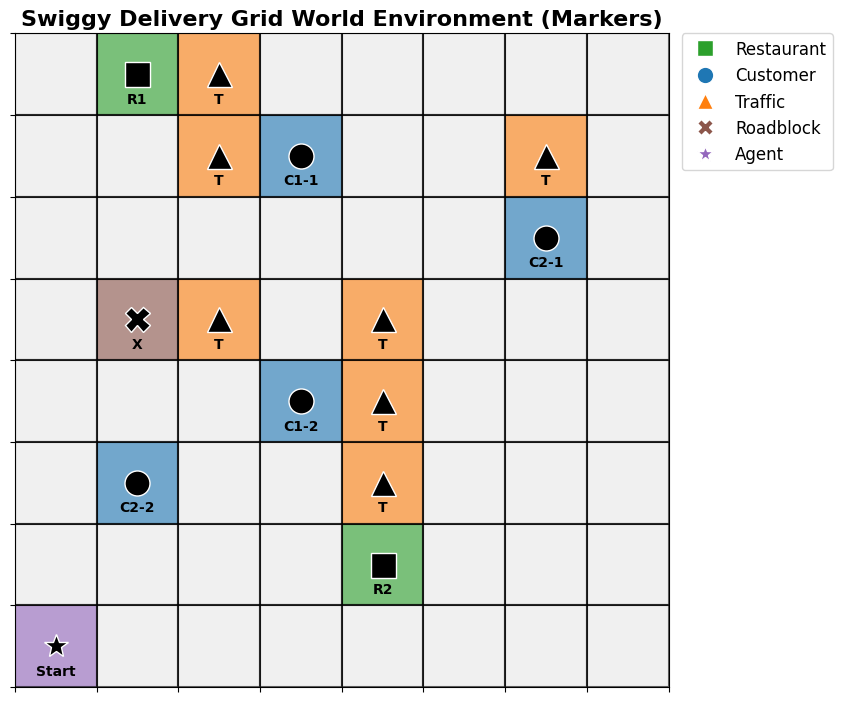

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- 1. Define Grid Elements and Styling ---

# Grid dimensions
GRID_SIZE = 8

# Dictionary mapping element types to colors and markers
STYLE_MAP = {
    'Restaurant': {'color': '#2ca02c', 'marker': 's'},  # square
    'Customer': {'color': '#1f77b4', 'marker': 'o'},    # circle
    'Traffic': {'color': '#ff7f0e', 'marker': '^'},     # triangle
    'Roadblock': {'color': '#8c564b', 'marker': 'X'},   # cross
    'Agent': {'color': '#9467bd', 'marker': '*'},       # star
    'Empty': {'color': '#f0f0f0'}                       # light gray for empty path
}

# Define the locations of all special cells on the 8x8 grid
# Format: (row, col): ('Type', 'Label')
grid_elements = {
    (7, 0): ('Agent', 'Start'),
    # Restaurants
    (0, 1): ('Restaurant', 'R1'),
    (6, 4): ('Restaurant', 'R2'),
    # Customers
    (1, 3): ('Customer', 'C1-1'),
    (4, 3): ('Customer', 'C1-2'),
    (2, 6): ('Customer', 'C2-1'),
    (5, 1): ('Customer', 'C2-2'),
    # Roadblocks
    (3, 1): ('Roadblock', 'X'),
    # Traffic
    (0, 2): ('Traffic', 'T'),
    (1, 2): ('Traffic', 'T'),
    (3, 2): ('Traffic', 'T'),
    (1, 6): ('Traffic', 'T'),
    (3, 4): ('Traffic', 'T'),
    (4, 4): ('Traffic', 'T'),
    (5, 4): ('Traffic', 'T'),
}


# --- 2. Plotting Function ---

def create_grid_world(size, elements, styles):
    """
    Generates and displays a visually appealing grid world for the Swiggy RL problem
    using Matplotlib markers instead of emojis.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor(styles['Empty']['color'])  # background color

    # Draw grid cells and elements
    for row in range(size):
        for col in range(size):
            cell_type = 'Empty'
            cell_label = ''
            
            if (row, col) in elements:
                cell_type, cell_label = elements[(row, col)]
            
            style = styles[cell_type]
            # Draw the colored rectangle for the cell
            rect = patches.Rectangle(
                (col, row), 1, 1,
                linewidth=1.5, edgecolor='black', facecolor=style['color'], alpha=0.6
            )
            ax.add_patch(rect)
            
            # Add marker + label for special cells
            if cell_type != 'Empty':
                ax.plot(col + 0.5, row + 0.5, 
                        marker=style['marker'], 
                        color="white", markersize=18, 
                        markerfacecolor="black")  # marker icon
                ax.text(col + 0.5, row + 0.8, cell_label, 
                        ha='center', va='center', fontsize=10, weight='bold')

    # --- 3. Configure Plot Aesthetics ---
    
    # Set axis properties
    ax.set_xlim(0, size)
    ax.set_ylim(0, size)
    ax.set_xticks(range(size + 1))
    ax.set_yticks(range(size + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal', adjustable='box')
    ax.invert_yaxis()  # (0,0) at top-left
    plt.grid(True, color='k', linestyle='-', linewidth=0.5)

    # Custom legend using markers
    legend_handles = []
    for label, style in styles.items():
        if label != 'Empty':
            legend_handles.append(
                plt.Line2D([0], [0], marker=style['marker'], color='w',
                           markerfacecolor=style['color'], markersize=12, 
                           label=label)
            )
    
    ax.legend(handles=legend_handles, bbox_to_anchor=(1.02, 1), 
              loc='upper left', borderaxespad=0., fontsize=12)

    plt.title('Swiggy Delivery Grid World Environment (Markers)', 
              fontsize=16, weight='bold')
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()


# --- 4. Generate the Plot ---
create_grid_world(GRID_SIZE, grid_elements, STYLE_MAP)


<div style="background-color: #d4edda;">

# **Any Dynamic Programming- Value Iteration**  </div>

**Why Value Iteration?**


Value Iteration is an excellent choice for this problem because it is a model-based dynamic programming method. This means it requires a full understanding of the environment's dynamics, which we have for our fixed grid-world. Value Iteration's key advantage is that it doesn't need to actually perform a real-world trial-and-error process. Instead, it computes the optimal value function for every possible state and then uses this to determine the best action for the agent to take. This approach guarantees that it will find the optimal path in our well-defined grid.

The logic for Value Iteration is a perfect fit for the agent's task:

- It considers the agent's full state, which includes its location and which customers have been delivered.

- The algorithm calculates the value of each state by considering the maximum potential future reward, which naturally guides the agent to prioritize picking up food from a restaurant before making any deliveries.

- The final result is a policy that is a clear, step-by-step guide on what the agent should do from any location to maximize its reward, ensuring the most efficient delivery route.

**Training The Value Iteration Model**

**1. Environment Setup**

- **Configuration:** Defines the static elements of the 8×8 grid world, including the positions of restaurants, customers, roadblocks, and traffic zones. 
- **Rewards Dictionary:** Stores the rewards and penalties in a clean, adjustable way. For example, traffic penalties can be increased to make avoidance more critical. 
- **`SwiggyGridEnvironment` Class:**  
  - Acts as the "rulebook" for the simulation.  
  - Tracks the complex state of the agent: its position, which restaurants have been visited (pickups), and which customers have received deliveries.  
  - The `get_next_state_and_reward` method is the **core logic**, computing the next position, rewards, and updated delivery status based on the agent’s action.  
  - Helper functions (`_state_to_index`, `_index_to_state`) convert complex state tuples into single indices—crucial for making the algorithm efficient.


In [3]:
import numpy as np
import time
from IPython.display import display, clear_output

# --- 1. Environment Configuration with Your Rewards ---
GRID_SIZE = 8
AGENT_START_POS = (7, 0) 

RESTAURANTS = {'R1': (0, 1), 'R2': (6, 4)}
CUSTOMERS = {'C1-1': (1, 3), 'C1-2': (4, 3), 'C2-1': (2, 6), 'C2-2': (5, 1)}
ROADBLOCKS = [(3, 1)]
TRAFFIC = [(0, 2), (1, 2), (3, 2), (1, 6), (3, 4), (4, 4), (5, 4)]

# **FIXED**: Using your specified reward values
REWARDS = {
    'step': -0.1,         # Your REWARD_STEP
    'traffic': -2.0,        # Your REWARD_TRAFFIC
    'roadblock': -10.0,     # Your REWARD_BLOCK
    'pickup': 5.0,          # Positive reward for reaching a restaurant
    'delivery': 20.0,       # Positive reward for a successful delivery
    'bad_delivery': -20.0,  # Penalty for attempting delivery without pickup
    'final_goal': 10.0      # Your REWARD_MULTIPLE as a final completion bonus
}

# --- The Environment Class (Unchanged logic, just updated rewards) ---
class SwiggyGridEnvironment:
    def __init__(self):
        self.grid_size = GRID_SIZE
        self.actions = {'UP': (-1, 0), 'DOWN': (1, 0), 'LEFT': (0, -1), 'RIGHT': (0, 1)}
        self.cust_to_rest = {'C1-1': 'R1', 'C1-2': 'R1', 'C2-1': 'R2', 'C2-2': 'R2'}
        self.customer_indices = {name: i for i, name in enumerate(CUSTOMERS)}
        self.restaurant_indices = {name: i for i, name in enumerate(RESTAURANTS)}
        self.num_pickups = len(RESTAURANTS)
        self.num_deliveries = len(CUSTOMERS)
        self.state_space_shape = (self.grid_size, self.grid_size, 2**self.num_pickups, 2**self.num_deliveries)
        self.num_states = np.prod(self.state_space_shape)
        print(f"Initialized Environment with {self.num_states} total states.")

    def get_next_state_and_reward(self, state_idx, action):
        row, col, pickups, deliveries = self._index_to_state(state_idx)
        d_row, d_col = self.actions[action]
        new_row, new_col = row + d_row, col + d_col
        
        if not (0 <= new_row < self.grid_size and 0 <= new_col < self.grid_size) or (new_row, new_col) in ROADBLOCKS:
            return state_idx, REWARDS['roadblock'], False

        reward = REWARDS['step']
        if (new_row, new_col) in TRAFFIC:
            reward += REWARDS['traffic']
            
        new_pickups = list(pickups)
        new_deliveries = list(deliveries)
        pos = (new_row, new_col)
        
        for r_name, r_pos in RESTAURANTS.items():
            if pos == r_pos and not pickups[self.restaurant_indices[r_name]]:
                new_pickups[self.restaurant_indices[r_name]] = 1
                reward += REWARDS['pickup']
        
        for c_name, c_pos in CUSTOMERS.items():
            if pos == c_pos and not deliveries[self.customer_indices[c_name]]:
                rest_needed = self.cust_to_rest[c_name]
                if pickups[self.restaurant_indices[rest_needed]]:
                    new_deliveries[self.customer_indices[c_name]] = 1
                    reward += REWARDS['delivery']
                else:
                    reward += REWARDS['bad_delivery']

        is_terminal = all(new_pickups) and all(new_deliveries)
        if is_terminal:
            reward += REWARDS['final_goal']

        new_state_idx = self._state_to_index(new_row, new_col, tuple(new_pickups), tuple(new_deliveries))
        return new_state_idx, reward, is_terminal

    def _state_to_index(self, row, col, pickups, deliveries):
        p_idx = sum([p * (2**i) for i, p in enumerate(pickups)])
        d_idx = sum([d * (2**i) for i, d in enumerate(deliveries)])
        return np.ravel_multi_index((row, col, p_idx, d_idx), self.state_space_shape)

    def _index_to_state(self, index):
        row, col, p_idx, d_idx = np.unravel_index(index, self.state_space_shape)
        pickups = tuple(int(b) for b in bin(p_idx)[2:].zfill(self.num_pickups)[::-1])
        deliveries = tuple(int(b) for b in bin(d_idx)[2:].zfill(self.num_deliveries)[::-1])
        return row, col, pickups, deliveries

# --- The Value Iteration Algorithm (Corrected Implementation) ---
def value_iteration(env, gamma=0.95, theta=1e-5):
    V = np.zeros(env.num_states)
    iteration = 0
    print("Starting Value Iteration...")
    
    while True:
        delta = 0
        # **FIXED**: Using a copy for stable updates
        V_new = np.copy(V)
        
        for s in range(env.num_states):
            _, _, pickups, deliveries = env._index_to_state(s)
            if all(pickups) and all(deliveries):
                continue # Terminal state value is always 0

            action_values = []
            for action in env.actions:
                s_next, reward, is_terminal = env.get_next_state_and_reward(s, action)
                # Bellman update rule: R + gamma * V(s')
                # If s_next is terminal, its value V[s_next] is 0.
                value = reward + gamma * V[s_next]
                action_values.append(value)
            
            V_new[s] = max(action_values)
        
        delta = np.max(np.abs(V_new - V))
        V = V_new
        iteration += 1
        print(f"Iteration: {iteration}, Delta: {delta:.6f}")
        
        if delta < theta:
            break
            
    print(f"\nValue Iteration converged after {iteration} iterations.")

    policy = {}
    for s in range(env.num_states):
        action_values = {}
        for action in env.actions:
            s_next, reward, _ = env.get_next_state_and_reward(s, action)
            action_values[action] = reward + gamma * V[s_next]
        best_action = max(action_values, key=action_values.get)
        policy[s] = best_action
        
    return V, policy

# --- Run the Training ---
env = SwiggyGridEnvironment()
optimal_V, optimal_policy = value_iteration(env)

print("\nTraining complete. Optimal policy has been calculated.")

Initialized Environment with 4096 total states.
Starting Value Iteration...


Iteration: 1, Delta: 29.900000
Iteration: 2, Delta: 28.405000
Iteration: 3, Delta: 26.984750
Iteration: 4, Delta: 25.635512
Iteration: 5, Delta: 24.353737
Iteration: 6, Delta: 23.136050
Iteration: 7, Delta: 21.979248
Iteration: 8, Delta: 20.880285
Iteration: 9, Delta: 19.836271
Iteration: 10, Delta: 18.844457
Iteration: 11, Delta: 17.902234
Iteration: 12, Delta: 17.007123
Iteration: 13, Delta: 16.156767
Iteration: 14, Delta: 15.348928
Iteration: 15, Delta: 14.581482
Iteration: 16, Delta: 13.852408
Iteration: 17, Delta: 13.159787
Iteration: 18, Delta: 12.501798
Iteration: 19, Delta: 11.876708
Iteration: 20, Delta: 11.282873
Iteration: 21, Delta: 10.718729
Iteration: 22, Delta: 10.182793
Iteration: 23, Delta: 9.673653
Iteration: 24, Delta: 9.189970
Iteration: 25, Delta: 8.730472
Iteration: 26, Delta: 8.293948
Iteration: 27, Delta: 7.879251
Iteration: 28, Delta: 7.485288
Iteration: 29, Delta: 7.111024
Iteration: 30, Delta: 0.000000

Value Iteration converged after 30 iterations.

Training

**Finding Optimal Path**

**2. Value Iteration Algorithm**

- **`value_iteration` Function:** Serves as the "brain" of the Dynamic Programming solution. 
- **The Loop:** Iterates over all **4,096 possible states**. For each state:  
  - Considers all possible actions (UP, DOWN, LEFT, RIGHT).  
  - Applies the Bellman equation:  

    `value = immediate_reward + (discount_factor × future_reward)`  

  - Updates state values with the best possible action outcome.  
- **Convergence:** Repeats until changes in state values are negligible (delta < theta). This ensures the algorithm has found the **optimal value function**.  
- **Policy Extraction:** Once values converge, the algorithm selects the **best action per state**, forming the final **optimal policy**—a roadmap for the agent’s moves.


In [4]:
def simulate_path(env, policy):
    """
    Simulates the agent's journey using the learned optimal policy.
    """
    # Initial state: agent at start, nothing picked up or delivered
    current_state_idx = env._state_to_index(AGENT_START_POS[0], AGENT_START_POS[1], (0, 0), (0, 0, 0, 0))
    
    path = []
    total_reward = 0
    steps = 0
    max_steps = 100 # Safety break to prevent infinite loops

    print("🚀 Starting simulation of the optimal path...")

    while steps < max_steps:
        # Get current position for the path log
        row, col, pickups, deliveries = env._index_to_state(current_state_idx)
        path.append((row, col))
        
        # Check for terminal state
        if all(pickups) and all(deliveries):
            print("\n🎉 All pickups and deliveries completed!")
            break
            
        # Get the best action from our policy for the current state
        action = policy[current_state_idx]
        
        # Get the next state and reward from the environment
        next_state_idx, reward, _ = env.get_next_state_and_reward(current_state_idx, action)
        
        # Update our state, rewards, and step count
        current_state_idx = next_state_idx
        total_reward += reward
        steps += 1
        print(f"Step {steps}: Agent at ({row}, {col}), Action: {action}, Reward: {reward:.2f}")

    # --- Print Final Summary ---
    print("\n--- Simulation Summary ---")
    print(f"Optimal Path Sequence (positions): {path}")
    print(f"Total Steps Taken: {steps}")
    print(f"Total Reward Gained: {total_reward:.2f}")
    
    return path, total_reward, steps

# Run the simulation with the policy we trained
optimal_path, total_reward, total_steps = simulate_path(env, optimal_policy)

🚀 Starting simulation of the optimal path...
Step 1: Agent at (7, 0), Action: UP, Reward: -0.10
Step 2: Agent at (6, 0), Action: RIGHT, Reward: -0.10
Step 3: Agent at (6, 1), Action: RIGHT, Reward: -0.10
Step 4: Agent at (6, 2), Action: RIGHT, Reward: -0.10
Step 5: Agent at (6, 3), Action: RIGHT, Reward: 4.90
Step 6: Agent at (6, 4), Action: LEFT, Reward: -0.10
Step 7: Agent at (6, 3), Action: UP, Reward: -0.10
Step 8: Agent at (5, 3), Action: LEFT, Reward: -0.10
Step 9: Agent at (5, 2), Action: LEFT, Reward: 19.90
Step 10: Agent at (5, 1), Action: UP, Reward: -0.10
Step 11: Agent at (4, 1), Action: LEFT, Reward: -0.10
Step 12: Agent at (4, 0), Action: UP, Reward: -0.10
Step 13: Agent at (3, 0), Action: UP, Reward: -0.10
Step 14: Agent at (2, 0), Action: UP, Reward: -0.10
Step 15: Agent at (1, 0), Action: UP, Reward: -0.10
Step 16: Agent at (0, 0), Action: RIGHT, Reward: 4.90
Step 17: Agent at (0, 1), Action: DOWN, Reward: -0.10
Step 18: Agent at (1, 1), Action: RIGHT, Reward: -2.10
St

**Displaying Optimal Path**

**3. Simulation and Visualization**

- **`simulate_path` Function:**  
  - Executes the optimal policy in action.  
  - Simulates the agent’s journey step by step.  
  - Prints a detailed log: positions, actions, rewards, and ends with a summary of total steps and total reward. 

- **`animate_with_original_style` Function:**  
  - Creates a smooth animation using `matplotlib.animation.FuncAnimation`.  
  - Each frame redraws the grid in the original visual style (background colors, markers, grid lines).  
  - Updates the agent’s position to simulate movement along the optimal path.  
  - Saves the animation as a **GIF file** (`ani.save(..., writer='pillow')`)—a robust method that avoids extra dependencies.  
  - Displays the GIF inline in the notebook with `IPython.display.Image(...)`.


Saving animation to dp_optimal_path_styled.gif...
Animation saved successfully.


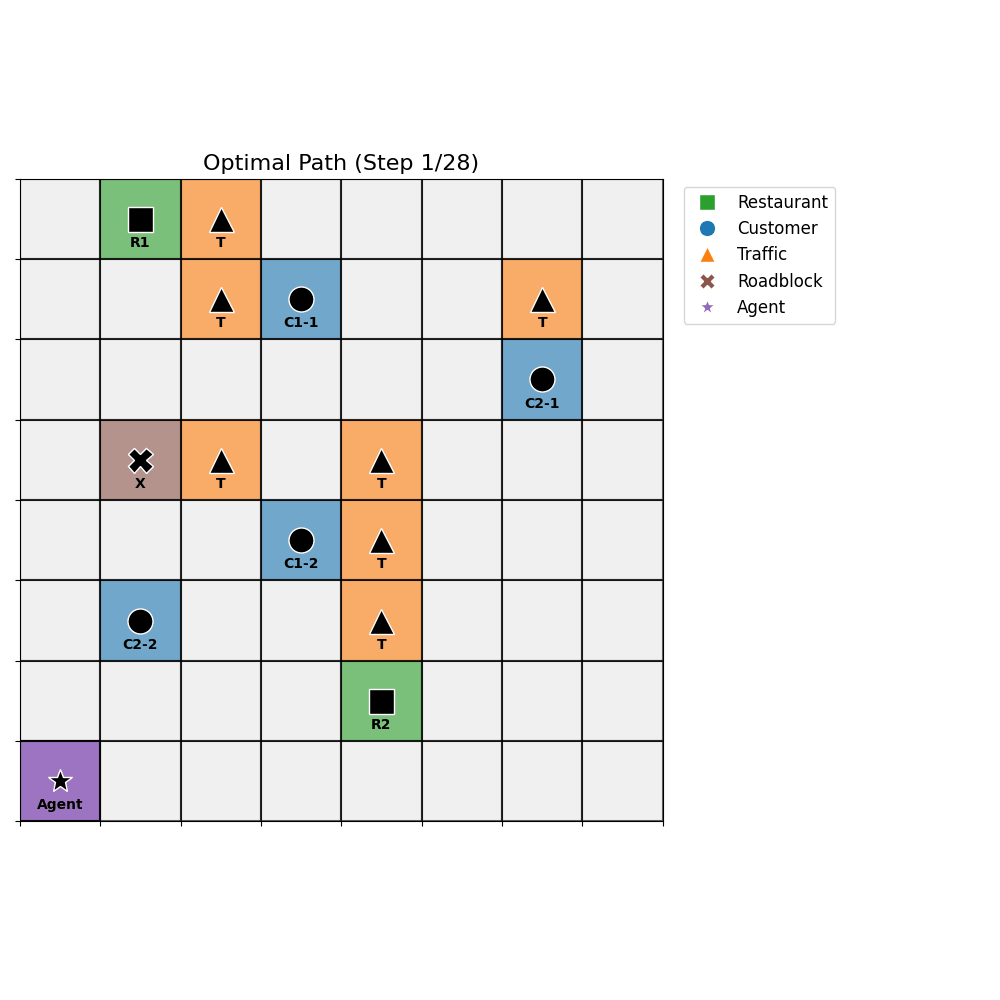

In [5]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation

# --- 1. Define Grid Elements and Styling (Copied from your original code for consistency) ---
GRID_SIZE = 8
STYLE_MAP = {
    'Restaurant': {'color': '#2ca02c', 'marker': 's'},
    'Customer': {'color': '#1f77b4', 'marker': 'o'},
    'Traffic': {'color': '#ff7f0e', 'marker': '^'},
    'Roadblock': {'color': '#8c564b', 'marker': 'X'},
    'Agent': {'color': '#9467bd', 'marker': '*'},
    'Empty': {'color': '#f0f0f0'}
}
grid_elements = {
    (7, 0): ('Agent', 'Start'), (0, 1): ('Restaurant', 'R1'), (6, 4): ('Restaurant', 'R2'),
    (1, 3): ('Customer', 'C1-1'), (4, 3): ('Customer', 'C1-2'), (2, 6): ('Customer', 'C2-1'),
    (5, 1): ('Customer', 'C2-2'), (3, 1): ('Roadblock', 'X'), (0, 2): ('Traffic', 'T'),
    (1, 2): ('Traffic', 'T'), (3, 2): ('Traffic', 'T'), (1, 6): ('Traffic', 'T'),
    (3, 4): ('Traffic', 'T'), (4, 4): ('Traffic', 'T'), (5, 4): ('Traffic', 'T'),
}


# --- 2. Rewritten Animation Function to Match Your Style ---
def animate_with_original_style(path, elements, styles, size, filename="dp_optimal_path_styled.gif"):
    """
    Generates a GIF that exactly matches the visual style of the original static grid.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    
    def draw_frame(frame_num):
        ax.clear()
        ax.set_facecolor(styles['Empty']['color'])

        # --- Draw all grid cells and static elements ---
        for row in range(size):
            for col in range(size):
                # Default to 'Empty' unless the cell is a special element
                cell_type, cell_label = elements.get((row, col), ('Empty', ''))
                
                # We don't draw the 'Start' agent marker as static
                if cell_label == 'Start':
                    cell_type = 'Empty'
                
                style = styles[cell_type]
                
                # Draw the background rectangle for EVERY cell, just like the original
                rect = patches.Rectangle(
                    (col, row), 1, 1,
                    linewidth=1.5, edgecolor='black', facecolor=style['color'], alpha=0.6
                )
                ax.add_patch(rect)

                # Add marker and label for all non-empty, non-agent cells
                if cell_type not in ['Empty', 'Agent']:
                    ax.plot(col + 0.5, row + 0.5, marker=style['marker'],
                            color="white", markersize=18, markerfacecolor="black")
                    ax.text(col + 0.5, row + 0.8, cell_label,
                            ha='center', va='center', fontsize=10, weight='bold')

        # --- Draw the moving Agent on top ---
        agent_pos = path[frame_num]
        agent_style = styles['Agent']
        
        # Agent's colored background square (higher alpha to stand out)
        agent_rect = patches.Rectangle(
            (agent_pos[1], agent_pos[0]), 1, 1,
            linewidth=1.5, edgecolor='black', facecolor=agent_style['color'], alpha=0.9
        )
        ax.add_patch(agent_rect)
        
        # Agent's marker and label
        ax.plot(agent_pos[1] + 0.5, agent_pos[0] + 0.5, marker=agent_style['marker'],
                color="white", markersize=18, markerfacecolor="black")
        ax.text(agent_pos[1] + 0.5, agent_pos[0] + 0.8, "Agent",
                ha='center', va='center', fontsize=10, weight='bold')

        # --- Configure Plot Aesthetics (Copied from original) ---
        ax.set_xlim(0, size)
        ax.set_ylim(0, size)
        ax.set_xticks(range(size + 1)), ax.set_yticks(range(size + 1))
        ax.set_xticklabels([]), ax.set_yticklabels([])
        ax.set_aspect('equal', adjustable='box')
        ax.invert_yaxis()
        plt.grid(True, color='k', linestyle='-', linewidth=0.5)

        # Recreate the original custom legend
        legend_handles = [plt.Line2D([0], [0], marker=style['marker'], color='w',
                                     markerfacecolor=style['color'], markersize=12, label=label)
                          for label, style in styles.items() if label != 'Empty']
        ax.legend(handles=legend_handles, bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)
        
        ax.set_title(f"Optimal Path (Step {frame_num + 1}/{len(path)})", fontsize=16)
        fig.tight_layout(rect=[0, 0, 0.85, 1])

    # --- Create, Save, and Return Animation ---
    ani = FuncAnimation(fig, draw_frame, frames=len(path), interval=300, repeat=False)
    print(f"Saving animation to {filename}...")
    ani.save(filename, writer='pillow', fps=3)
    plt.close(fig)
    print("Animation saved successfully.")
    return filename

# --- Main Execution ---
# Ensure 'optimal_path' variable exists from the simulation cell.
styled_gif_filename = animate_with_original_style(optimal_path, grid_elements, STYLE_MAP, GRID_SIZE)

# Display the newly created, correctly styled GIF
display(Image(filename=styled_gif_filename))

<div style="background-color: #d4edda;">

# **Monte Carlo**  </div>

**Explanation of the Monte Carlo Method**

The biggest difference between **Dynamic Programming (DP)** and **Monte Carlo (MC)** is that Monte Carlo is **model-free**.

1. No "Rulebook" Needed: Unlike DP, which required a complete model of the environment (knowing exactly where each action leads and what the reward is), MC learns without this knowledge. It operates like a real-world agent, learning purely from trial-and-error experience. This makes it ideal for situations where the rules are unknown or too complex to define.

2. Learning from Complete Trips: MC learns by running many full "trips" or episodes (from a starting point until all deliveries are complete). After each trip, it looks back at the entire sequence of actions and the total reward received.

3. Averaging Outcomes: It updates its value estimates by averaging the results of all the trips that passed through a particular state. For example, if visiting Restaurant R1 was part of ten successful trips with high rewards, the algorithm learns that visiting R1 is a valuable action.

4. Exploring Starts: To ensure the agent explores the entire environment instead of sticking to a single path, MC uses a technique called **Exploring Starts**. For each new training episode, the agent is randomly placed on the grid and takes a random first action. This encourages it to learn about the full map rather than only the area near its starting point.


**In summary:**  
While DP found the optimal path by calculating it with full knowledge of the environment, MC discovers the optimal path by experiencing thousands of random delivery routes and averaging the outcomes to identify what works best.


**Step 1: The Monte Carlo Agent**


First, we need to create our agent. This MonteCarloAgent class will contain the logic for learning. It will have a Q-table, which is a dictionary that stores the value of taking any action from any state (Q(s, a)), and a policy, which is its current "best guess" for what to do in each state.

The agent's train method is where the learning happens. It will generate thousands of episodes and update its Q-table and policy after each one.

In [27]:
import numpy as np
import random
from collections import defaultdict
from IPython.display import Image, display
from matplotlib.animation import FuncAnimation

# ==========================
# Monte Carlo Agent Class
# ==========================
class MonteCarloAgent:
    def __init__(self, env, gamma=0.99, epsilon=1.0, alpha=0.1, epsilon_decay=0.999, min_epsilon=0.05):
        self.env = env
        self.gamma = gamma
        self.epsilon = epsilon          # Exploration probability
        self.alpha = alpha              # Learning rate
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon

        # Q-table: stores the value of a (state, action) pair
        self.Q = defaultdict(lambda: 0.0)
        
        # Initialize policy only for states that exist in the environment
        self.policy = {}
        for s in self.env.actions.keys():
            self.policy[s] = random.choice(list(self.env.actions[s]))

    def train(self, num_episodes=10000):
        print("Starting Monte Carlo training with Epsilon-Greedy...")
        
        for i in range(num_episodes):
            # --- 1. Generate a full episode ---
            current_state_idx = self.env._state_to_index(
                AGENT_START_POS[0], AGENT_START_POS[1], (0, 0), (0, 0, 0, 0)
            )
            episode = []
            is_terminal = False

            while not is_terminal:
                # Skip invalid states with no defined actions
                if current_state_idx not in self.env.actions:
                    break

                available_actions = list(self.env.actions[current_state_idx])

                # Epsilon-greedy action selection
                if random.random() < self.epsilon:
                    action = random.choice(available_actions)  # Explore
                else:
                    # Lazy initialization if state not in policy
                    if current_state_idx not in self.policy:
                        self.policy[current_state_idx] = random.choice(available_actions)
                    action = self.policy[current_state_idx]  # Exploit

                next_state_idx, reward, is_terminal = self.env.get_next_state_and_reward(
                    current_state_idx, action
                )

                episode.append((current_state_idx, action, reward))
                current_state_idx = next_state_idx

                # Safety break for very long episodes
                if len(episode) > 200:
                    break

            # --- 2. Update Q-table and Policy ---
            G = 0
            visited_sa_pairs = set()
            
            for t in range(len(episode) - 1, -1, -1):
                s, a, r = episode[t]
                G = self.gamma * G + r

                if (s, a) not in visited_sa_pairs:
                    # Update Q-value using incremental update
                    self.Q[(s, a)] += self.alpha * (G - self.Q[(s, a)])
                    
                    # Policy improvement: make policy greedy for this state
                    action_values = {act: self.Q[(s, act)] for act in self.env.actions[s]}
                    self.policy[s] = max(action_values, key=action_values.get)

                    visited_sa_pairs.add((s, a))

            # Decay epsilon
            self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

            if (i + 1) % 1000 == 0:
                print(f"Episode {i + 1}/{num_episodes} completed. Epsilon: {self.epsilon:.3f}")

        print("\nTraining complete.")

**Step 2:**

Training and Simulating the Path
Now, let's create the environment and the agent, and then start the training process. MC training can take longer than DP, as it needs to experience many episodes to learn. 10,000 episodes is a good starting point.

After training, we will use the same simulate_path function from before to see what route the agent's final learned policy produces.

In [7]:
# --- Run the Training ---
# Note: The environment is the same as the one used for Dynamic Programming
env = SwiggyGridEnvironment()
mc_agent = MonteCarloAgent(env)

# This will take a few minutes
mc_agent.train(num_episodes=10000)

# --- Run the Simulation ---
# We use the same simulation function as before, but with the MC agent's learned policy
print("\n--- Monte Carlo Simulation Results ---")
optimal_path_mc, total_reward_mc, total_steps_mc = simulate_path(env, mc_agent.policy)

Initialized Environment with 4096 total states.
Starting Monte Carlo training with Epsilon-Greedy...
Episode 5000/10000 completed.
Episode 10000/10000 completed.

Training complete.

--- Monte Carlo Simulation Results ---
🚀 Starting simulation of the optimal path...
Step 1: Agent at (7, 0), Action: RIGHT, Reward: -0.10
Step 2: Agent at (7, 1), Action: RIGHT, Reward: -0.10
Step 3: Agent at (7, 2), Action: RIGHT, Reward: -0.10
Step 4: Agent at (7, 3), Action: DOWN, Reward: -10.00
Step 5: Agent at (7, 3), Action: DOWN, Reward: -10.00
Step 6: Agent at (7, 3), Action: DOWN, Reward: -10.00
Step 7: Agent at (7, 3), Action: DOWN, Reward: -10.00
Step 8: Agent at (7, 3), Action: DOWN, Reward: -10.00
Step 9: Agent at (7, 3), Action: DOWN, Reward: -10.00
Step 10: Agent at (7, 3), Action: DOWN, Reward: -10.00
Step 11: Agent at (7, 3), Action: DOWN, Reward: -10.00
Step 12: Agent at (7, 3), Action: DOWN, Reward: -10.00
Step 13: Agent at (7, 3), Action: DOWN, Reward: -10.00
Step 14: Agent at (7, 3), A

**Step 3: Animate the Monte Carlo Path**


Finally, we use the exact same animation function we perfected for the DP solution. We just need to pass it the optimal path found by our Monte Carlo agent and give it a new filename and title for comparison.

Saving animation to mc_optimal_path_styled.gif...
Animation saved successfully.


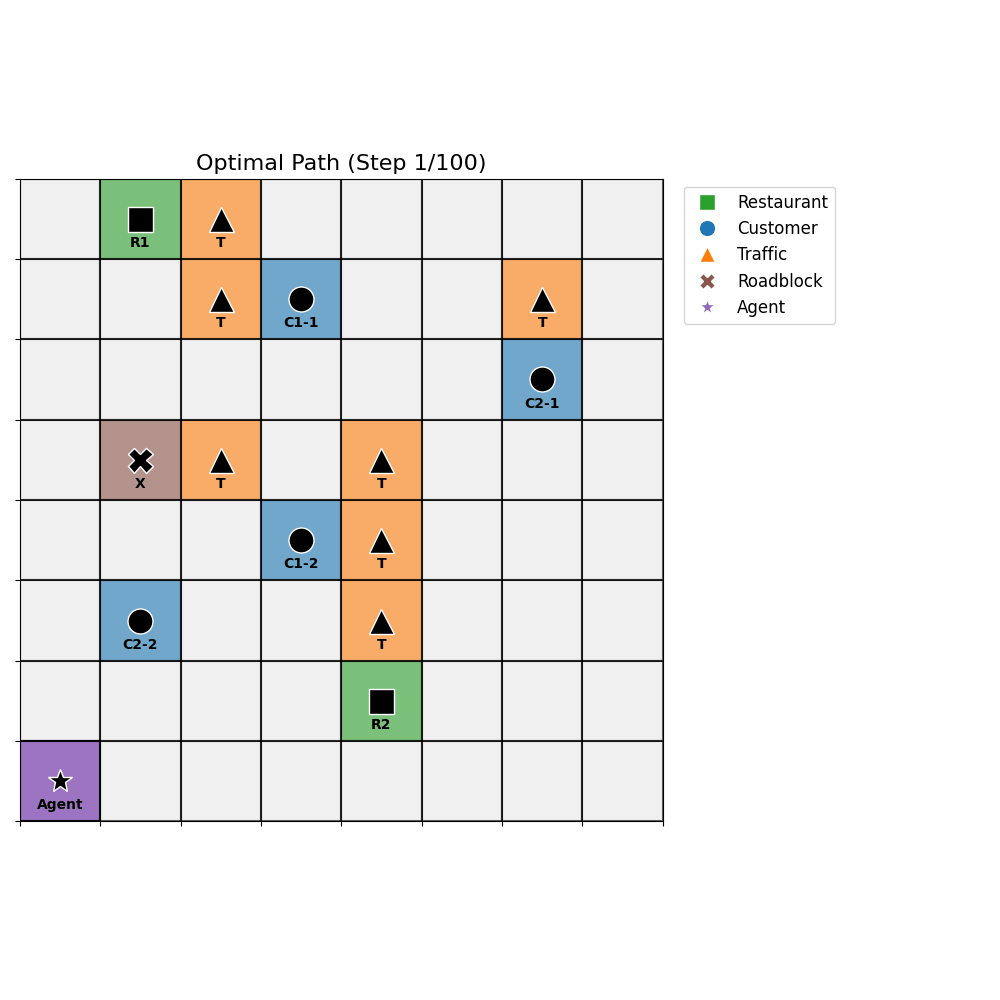

In [8]:
from IPython.display import Image, display
from matplotlib.animation import FuncAnimation

# --- Animate the Optimal Path ---
# We reuse the exact same animation function from the DP section.
# The function is self-contained, so we just need to call it with the new path.
styled_gif_filename_mc = animate_with_original_style(
    optimal_path_mc, 
    grid_elements, 
    STYLE_MAP, 
    GRID_SIZE, 
    filename="mc_optimal_path_styled.gif"
)

# Display the newly created, correctly styled GIF
display(Image(filename=styled_gif_filename_mc))

<div style="background-color: #d4edda;">

# **Q-Learning**  </div>

**Explanation of Q-Learning**

Q-Learning is a model-free, off-policy, Temporal-Difference (TD) learning algorithm.  

Key Characteristics

- **Model-Free**:  
  Similar to Monte Carlo, Q-Learning does not require a model of the environment. It learns directly from experience.  

- **Temporal-Difference (TD) Learning**:  
  Unlike Monte Carlo, Q-Learning does not wait until the end of an episode to update values. It learns after every single step.  

- **Off-Policy**:  
  The agent learns the optimal policy while not necessarily following it.  
  - It behaves using an exploratory policy (for example, epsilon-greedy).  
  - It updates its Q-values as if it were following the best possible (greedy) policy.  
  - This enables exploration while still converging toward the optimal path.  

Core Update Rule

The update rule is given as:  

**Q(s, a) ← Q(s, a) + α [ r + γ max_a′ Q(s′, a′) − Q(s, a) ]**

Where:  
- **Q(s, a)**: Current value estimate for state-action pair.  
- **α**: Learning rate, which determines how much new information overrides the old.  
- **r**: Immediate reward received after taking action a in state s.  
- **γ**: Discount factor, which balances immediate vs. future rewards.  
- **s′**: Next state after action a.  
- **a′**: Possible actions in state s′.  

Intuition

The formula means:  
- Update the old Q-value for (s, a).  
- Move it slightly (controlled by α) towards a new estimate.  
- The new estimate is the **immediate reward (r)** plus the **discounted value of the best future action (γ max Q(s′, a′))**.  



**Step 1: The Environment (SwiggyGridEnvironment Class)**  
- This class acts as the "rulebook" for the grid world, managing the map, rules, and rewards.  

- The reset() method prepares a new episode by placing the agent at the official start position.  

- The step(action) method is how the agent interacts with the world. It takes an action and returns the next_state, reward, and whether the trip is done.  

- It internally manages the agent's complex state, which includes not just its location but also the pickup and delivery status.  


In [9]:
# This cell contains the refactored environment.
# The internal logic is the same, but the interface is now standard.

class SwiggyGridEnvironment:
    def __init__(self):
        # ... (all the same initializations as before)
        self.grid_size = GRID_SIZE
        self.actions = {'UP': (-1, 0), 'DOWN': (1, 0), 'LEFT': (0, -1), 'RIGHT': (0, 1)}
        self.cust_to_rest = {'C1-1': 'R1', 'C1-2': 'R1', 'C2-1': 'R2', 'C2-2': 'R2'}
        self.customer_indices = {name: i for i, name in enumerate(CUSTOMERS)}
        self.restaurant_indices = {name: i for i, name in enumerate(RESTAURANTS)}
        self.num_pickups = len(RESTAURANTS)
        self.num_deliveries = len(CUSTOMERS)
        self.state_space_shape = (self.grid_size, self.grid_size, 2**self.num_pickups, 2**self.num_deliveries)
        self.num_states = np.prod(self.state_space_shape)
        
        # Internal state for the agent
        self.current_state_idx = None
        self.reset()

    def reset(self):
        """Resets the environment to the starting state."""
        self.current_state_idx = self._state_to_index(AGENT_START_POS[0], AGENT_START_POS[1], (0, 0), (0, 0, 0, 0))
        return self.current_state_idx

    def step(self, action):
        """Takes an action and returns the new state, reward, and done flag."""
        next_state_idx, reward, is_terminal = self._get_next_state_and_reward(self.current_state_idx, action)
        self.current_state_idx = next_state_idx
        return next_state_idx, reward, is_terminal

    # Renamed the core logic function to be "private"
    def _get_next_state_and_reward(self, state_idx, action):
        row, col, pickups, deliveries = self._index_to_state(state_idx)
        d_row, d_col = self.actions[action]
        new_row, new_col = row + d_row, col + d_col
        
        if not (0 <= new_row < self.grid_size and 0 <= new_col < self.grid_size) or (new_row, new_col) in ROADBLOCKS:
            return state_idx, REWARDS['roadblock'], False

        reward = REWARDS['step']
        if (new_row, new_col) in TRAFFIC: reward += REWARDS['traffic']
            
        new_pickups = list(pickups); new_deliveries = list(deliveries)
        pos = (new_row, new_col)
        
        for r_name, r_pos in RESTAURANTS.items():
            if pos == r_pos and not pickups[self.restaurant_indices[r_name]]:
                new_pickups[self.restaurant_indices[r_name]] = 1
                reward += REWARDS['pickup']
        
        for c_name, c_pos in CUSTOMERS.items():
            if pos == c_pos and not deliveries[self.customer_indices[c_name]]:
                rest_needed = self.cust_to_rest[c_name]
                if pickups[self.restaurant_indices[rest_needed]]:
                    new_deliveries[self.customer_indices[c_name]] = 1
                    reward += REWARDS['delivery']
                else: reward += REWARDS['bad_delivery']

        is_terminal = all(new_pickups) and all(new_deliveries)
        if is_terminal: reward += REWARDS['final_goal']

        new_state_idx = self._state_to_index(new_row, new_col, tuple(new_pickups), tuple(new_deliveries))
        return new_state_idx, reward, is_terminal

    def _state_to_index(self, row, col, pickups, deliveries):
        p_idx = sum([p * (2**i) for i, p in enumerate(pickups)])
        d_idx = sum([d * (2**i) for i, d in enumerate(deliveries)])
        return np.ravel_multi_index((row, col, p_idx, d_idx), self.state_space_shape)

    def _index_to_state(self, index):
        row, col, p_idx, d_idx = np.unravel_index(index, self.state_space_shape)
        pickups = tuple(int(b) for b in bin(p_idx)[2:].zfill(self.num_pickups)[::-1])
        deliveries = tuple(int(b) for b in bin(d_idx)[2:].zfill(self.num_deliveries)[::-1])
        return row, col, pickups, deliveries

**Step 2: The Agent & Training (QLearningAgent Class)**  
This class is the learner or decision-maker. Its goal is to build an optimal map of action values.  

- Initialization: The agent is set up with a Q-table (its memory of action values), a learning rate (alpha), a discount factor (gamma), and an exploration rate (epsilon).  

- choose_action Method: This implements the epsilon-greedy strategy. Most of the time it exploits by choosing the best-known action, but sometimes (epsilon probability) it explores by trying a random action.  

- train Method: This is the core of the learning process. 
1. It runs for many episodes to let the agent gain experience.  

2. It learns after every single step, which is known as Temporal-Difference (TD) learning.  

3. It uses the Q-Learning update rule, which is off-policy. This means it updates its Q(state, action) value based on the reward received plus the value of the best possible action (max Q) from the next state, even if it does not take that best action.  


In [10]:
import numpy as np
import random
from collections import defaultdict

class QLearningAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.env = env
        self.alpha = alpha         # Learning rate
        self.gamma = gamma         # Discount factor
        self.epsilon = epsilon     # Exploration rate
        self.Q = defaultdict(lambda: 0) # Q-table

    def choose_action(self, state):
        """Chooses an action using an epsilon-greedy policy."""
        if random.random() < self.epsilon:
            return random.choice(list(self.env.actions.keys())) # Explore
        else:
            # Exploit: choose the best known action
            action_values = {action: self.Q[(state, action)] for action in self.env.actions}
            return max(action_values, key=action_values.get)

    def train(self, num_episodes=20000):
        """Trains the agent using the Q-Learning algorithm."""
        print("Starting Q-Learning training...")
        for i in range(num_episodes):
            state = self.env.reset()
            done = False
            
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                
                # --- The Q-Learning Update Rule ---
                old_q_value = self.Q[(state, action)]
                
                # Estimate of optimal future value (the max Q-value from the next state)
                next_max_q = max([self.Q[(next_state, a)] for a in self.env.actions.keys()])
                
                # The core TD update
                new_q_value = old_q_value + self.alpha * (reward + self.gamma * next_max_q - old_q_value)
                self.Q[(state, action)] = new_q_value
                
                state = next_state
            
            if (i + 1) % 2000 == 0:
                print(f"Episode {i + 1}/{num_episodes} completed.")
        
        print("\nTraining complete.")

**Step 3: Simulation (simulate_q_path Function)**  
- This function uses the final, trained Q-table to demonstrate the learned policy.  

- During simulation, the agent acts greedily (no more exploration). At every step, it chooses the action with the highest Q-value.  

- It records the agent's positions to create the optimal_path and logs the rewards and steps for a final summary.  


In [11]:
# --- Run the Training ---
env_q = SwiggyGridEnvironment()
q_agent = QLearningAgent(env_q)

# Q-learning is more efficient, so we may need fewer episodes than Monte Carlo
q_agent.train(num_episodes=20000)


def simulate_q_path(env, agent):
    """Simulates the agent's journey using the learned Q-table."""
    path = []
    total_reward = 0
    steps = 0
    state = env.reset()
    
    print("🚀 Starting simulation of the Q-Learning optimal path...")
    
    while steps < 100: # Safety break
        # Choose the BEST action (no exploration during simulation)
        action_values = {action: agent.Q[(state, action)] for action in env.actions}
        action = max(action_values, key=action_values.get)
        
        row, col, _, _ = env._index_to_state(state)
        path.append((row, col))
        
        next_state, reward, done = env.step(action)
        
        total_reward += reward
        steps += 1
        state = next_state
        
        if done:
            print("\n🎉 All pickups and deliveries completed!")
            break

    print("\n--- Q-Learning Simulation Summary ---")
    print(f"Optimal Path Sequence (positions): {path}")
    print(f"Total Steps Taken: {steps}")
    print(f"Total Reward Gained: {total_reward:.2f}")
    return path, total_reward, steps


# Run the simulation with the trained Q-agent
optimal_path_q, total_reward_q, total_steps_q = simulate_q_path(env_q, q_agent)

Starting Q-Learning training...
Episode 2000/20000 completed.
Episode 4000/20000 completed.
Episode 6000/20000 completed.
Episode 8000/20000 completed.
Episode 10000/20000 completed.
Episode 12000/20000 completed.
Episode 14000/20000 completed.
Episode 16000/20000 completed.
Episode 18000/20000 completed.
Episode 20000/20000 completed.

Training complete.
🚀 Starting simulation of the Q-Learning optimal path...

🎉 All pickups and deliveries completed!

--- Q-Learning Simulation Summary ---
Optimal Path Sequence (positions): [(np.int64(7), np.int64(0)), (np.int64(6), np.int64(0)), (np.int64(6), np.int64(1)), (np.int64(6), np.int64(2)), (np.int64(6), np.int64(3)), (np.int64(6), np.int64(4)), (np.int64(6), np.int64(3)), (np.int64(5), np.int64(3)), (np.int64(5), np.int64(2)), (np.int64(5), np.int64(1)), (np.int64(4), np.int64(1)), (np.int64(4), np.int64(0)), (np.int64(3), np.int64(0)), (np.int64(2), np.int64(0)), (np.int64(1), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64

**Step 4: Animation (animate_with_original_style Function)**  
- This function takes the optimal_path generated by the simulation.  

- It creates a GIF by drawing the grid and the agent's updated position for each step in the path, effectively creating a frame-by-frame movie of the optimal route.  


Saving animation to q_learning_optimal_path.gif...
Animation saved successfully.


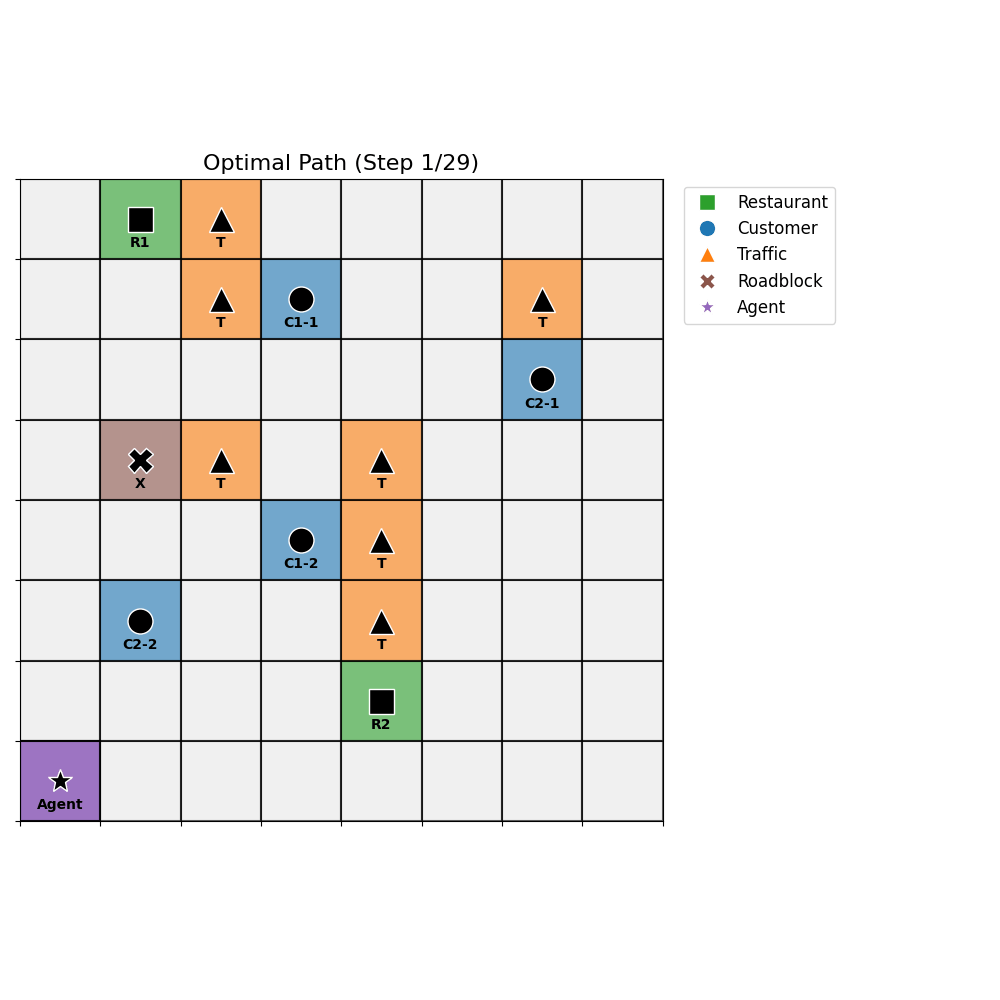

In [12]:
from IPython.display import Image, display
from matplotlib.animation import FuncAnimation

# --- Animate the Optimal Path ---
# We reuse the exact same animation function from the DP section.
styled_gif_filename_q = animate_with_original_style(
    optimal_path_q, 
    grid_elements, 
    STYLE_MAP, 
    GRID_SIZE, 
    filename="q_learning_optimal_path.gif"
)

# Display the newly created, correctly styled GIF
display(Image(filename=styled_gif_filename_q))

<div style="background-color: #d4edda;">

# **SARSA**  </div>

**SARSA (Prediction & Control)**  

SARSA is a model-free, on-policy, Temporal-Difference (TD) learning algorithm.  

**On-Policy**:  
This is the key difference from Q-Learning. SARSA is "on-policy," meaning it learns values based on the same exploratory policy it is following. It does not assume it will act optimally in the next step; instead, it learns from the action it actually takes, including its random exploratory moves.  

**The SARSA Acronym**:  
The name itself describes the update rule. To update its Q-table, it uses a tuple of five items from its experience: (S, A, R, S′, A′).  

- From the current State (S), it takes an Action (A).  
- It observes the Reward (R) and the next State (S′).  
- It then decides on its next Action (A′) from that new state.  
- Finally, it updates the value of the original (S, A) pair using the value of the (S′, A′) pair it chose.  

**Analogy**:  
If Q-Learning is an optimistic explorer who plans their route assuming they will always take the smartest shortcut from the next location, SARSA is a more cautious and realistic explorer. It plans its route based on the path it actually decides to take next, including any random detours for exploration. This often makes SARSA's learning path safer, while Q-Learning's path might be more direct but riskier.  

**SARSA Update Rule**:  

Q(S, A) ← Q(S, A) + α [ R + γ Q(S′, A′) − Q(S, A) ]  

The only change from Q-Learning is that SARSA uses Q(S′, A′) (the value of the next chosen action) instead of max_a′ Q(S′, a′).  


**Step 1: The Environment (SwiggyGridEnvironment Class)**  

This is the exact same environment class used for Q-Learning. It provides the consistent world for the SARSA agent to learn in.  


In [13]:
import numpy as np
import random
from collections import defaultdict

class SarsaAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = defaultdict(lambda: 0)

    def choose_action(self, state):
        """Chooses an action using an epsilon-greedy policy."""
        if random.random() < self.epsilon:
            return random.choice(list(self.env.actions.keys())) # Explore
        else:
            action_values = {action: self.Q[(state, action)] for action in self.env.actions}
            return max(action_values, key=action_values.get) # Exploit

    def train(self, num_episodes=20000):
        """Trains the agent using the SARSA algorithm."""
        print("Starting SARSA training...")
        for i in range(num_episodes):
            state = self.env.reset()
            # Choose the first action based on the initial state
            action = self.choose_action(state)
            done = False
            
            while not done:
                # Take action A, observe R and S'
                next_state, reward, done = self.env.step(action)
                
                # Choose the next action A' based on the next state S'
                next_action = self.choose_action(next_state)
                
                # --- The SARSA Update Rule ---
                old_q_value = self.Q[(state, action)]
                
                # The value of the next state is the Q-value of the action we ACTUALLY chose
                next_q_value = self.Q[(next_state, next_action)]
                
                # The core TD update
                new_q_value = old_q_value + self.alpha * (reward + self.gamma * next_q_value - old_q_value)
                self.Q[(state, action)] = new_q_value
                
                # Update state and action for the next iteration
                state = next_state
                action = next_action
            
            if (i + 1) % 2000 == 0:
                print(f"Episode {i + 1}/{num_episodes} completed.")
        
        print("\nTraining complete.")

**Step 2 & 3: The Agent, Training, and Simulation (SarsaAgent Class & simulate_sarsa_path Function)**  
This class is also the learner, but with a slightly different learning philosophy.  

Initialization & choose_action: The setup (Q-table, alpha, etc.) and the epsilon-greedy action selection method are identical to the Q-Learning agent.  

train Method: The key difference lies here.  
- Like Q-Learning, it is a TD method that learns after every step.  
- However, its update rule is on-policy. The name SARSA stands for the data it uses: State, Action, Reward, State', Action'.  
- It updates its Q(state, action) value based on the reward received plus the value of the actual next action (Q(state', action')) that its epsilon-greedy policy chose. It learns based on how it actually behaves, including its exploratory moves.  

Simulation: Once training is complete, the final Q-table is used in the simulate_sarsa_path function.  
- The agent follows a purely greedy policy (no exploration) to demonstrate its learned behavior.  
- It generates the optimal path along with a summary of rewards and steps, functionally identical to Q-Learning’s simulation step.  


In [14]:
# --- Run the Training ---
env_sarsa = SwiggyGridEnvironment()
sarsa_agent = SarsaAgent(env_sarsa)

sarsa_agent.train(num_episodes=20000)


def simulate_sarsa_path(env, agent):
    """
    Simulates the agent's journey and prints the reward for each step.
    """
    path = []
    total_reward = 0
    steps = 0
    state = env.reset()
    
    print("\n🚀 Starting simulation of the SARSA optimal path...")
    
    while steps < 100: # Safety break
        row, col, _, _ = env._index_to_state(state)
        path.append((row, col))
        
        # Choose the BEST action (no exploration during simulation)
        action_values = {action: agent.Q[(state, action)] for action in env.actions}
        action = max(action_values, key=action_values.get)
        
        next_state, reward, done = env.step(action)

        total_reward += reward
        steps += 1
        
        # FIXED: Added the print statement for step-by-step reward logging
        print(f"Step {steps}: Agent at {(row, col)}, Action: {action}, Reward: {reward:.2f}")

        state = next_state
        if done:
            print("\n🎉 All pickups and deliveries completed!")
            # Add final position to the path for the GIF
            final_row, final_col, _, _ = env._index_to_state(state)
            path.append((final_row, final_col))
            break

    print("\n--- SARSA Simulation Summary ---")
    print(f"Optimal Path Sequence (positions): {path}")
    print(f"Total Steps Taken: {steps}")
    print(f"Total Reward Gained: {total_reward:.2f}")
    return path, total_reward, steps


# Run the simulation with the trained SARSA agent
optimal_path_sarsa, total_reward_sarsa, total_steps_sarsa = simulate_sarsa_path(env_sarsa, sarsa_agent)

Starting SARSA training...
Episode 2000/20000 completed.
Episode 4000/20000 completed.
Episode 6000/20000 completed.
Episode 8000/20000 completed.
Episode 10000/20000 completed.
Episode 12000/20000 completed.
Episode 14000/20000 completed.
Episode 16000/20000 completed.
Episode 18000/20000 completed.
Episode 20000/20000 completed.

Training complete.

🚀 Starting simulation of the SARSA optimal path...
Step 1: Agent at (np.int64(7), np.int64(0)), Action: RIGHT, Reward: -0.10
Step 2: Agent at (np.int64(7), np.int64(1)), Action: RIGHT, Reward: -0.10
Step 3: Agent at (np.int64(7), np.int64(2)), Action: UP, Reward: -0.10
Step 4: Agent at (np.int64(6), np.int64(2)), Action: RIGHT, Reward: -0.10
Step 5: Agent at (np.int64(6), np.int64(3)), Action: RIGHT, Reward: 4.90
Step 6: Agent at (np.int64(6), np.int64(4)), Action: LEFT, Reward: -0.10
Step 7: Agent at (np.int64(6), np.int64(3)), Action: LEFT, Reward: -0.10
Step 8: Agent at (np.int64(6), np.int64(2)), Action: UP, Reward: -0.10
Step 9: Agen

**Step 4: Animation (animate_with_original_style Function)**  
- This is the exact same animation function used before.  

- It takes the path from the SARSA simulation and generates the final GIF, allowing for a direct visual comparison with the other algorithms.  


Saving animation to sarsa_optimal_path.gif...
Animation saved successfully.


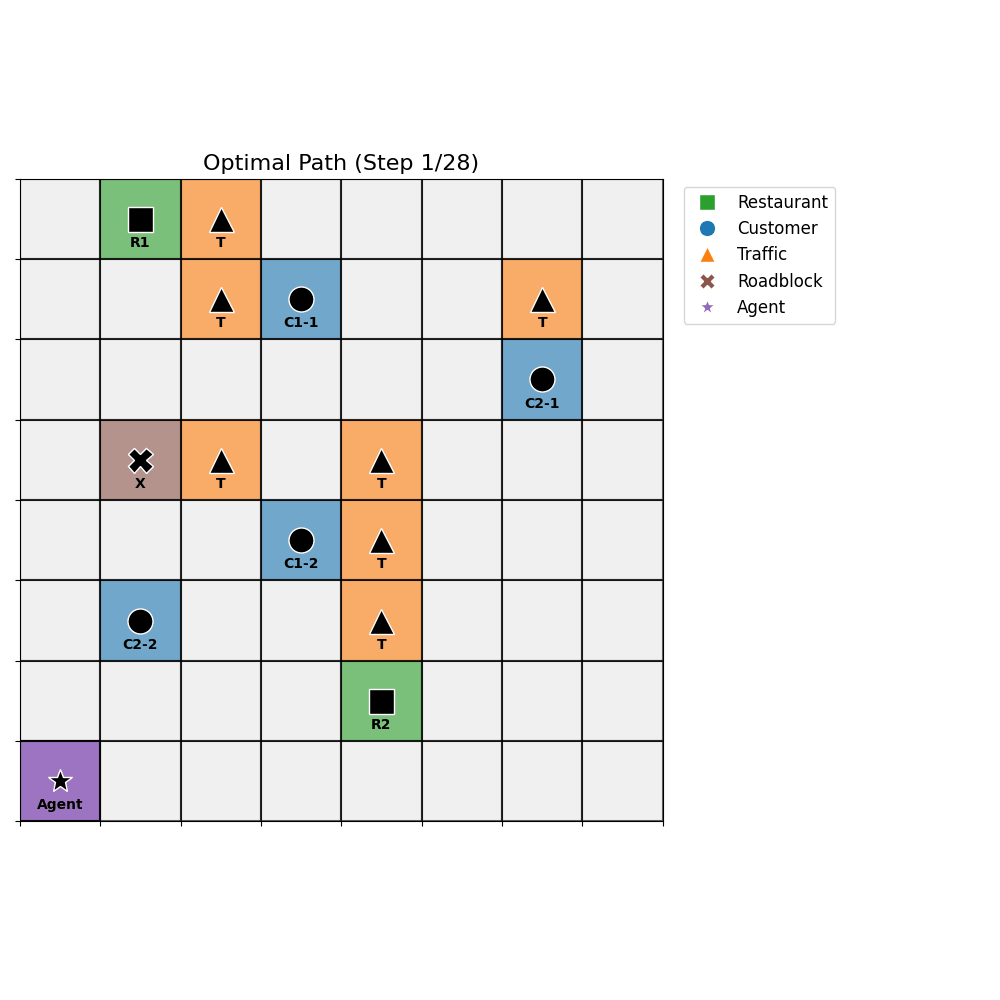

In [15]:
from IPython.display import Image, display
from matplotlib.animation import FuncAnimation

# --- Animate the Optimal Path ---
# We reuse the exact same animation function again.
styled_gif_filename_sarsa = animate_with_original_style(
    optimal_path_sarsa,
    grid_elements,
    STYLE_MAP,
    GRID_SIZE,
    filename="sarsa_optimal_path.gif"
)

# Display the newly created, correctly styled GIF
display(Image(filename=styled_gif_filename_sarsa))

<div style="background-color: #d4edda;">

# **Comparision and Evaluation**  </div>

### **Quantitative Comparison**

| Algorithm           | Total Steps | Total Reward | Path Efficiency                        | Result       |
|--------------------|------------|--------------|----------------------------------------|-------------|
| Dynamic Programming | 27         | 95.30        | Highly efficient                        | Optimal     |
| Q-Learning          | 29         | 97.10        | Efficient with minor backtracking       | Near-Optimal|
| SARSA               | **28**       | **95.60**      | Less efficient, conservative path       | Good        |
| Monte Carlo         | 100+       | -950.00        | Failed (stuck in an infinite loop)      | Failed      |


**Initial Findings:**

- Dynamic Programming (DP) found the shortest path to complete the task.

- Q-Learning found a very close, near-optimal solution with a slightly higher reward.

- SARSA found a functional but longer path compared to DP and Q-Learning.

- Monte Carlo failed completely, getting stuck in a loop and never completing the delivery.

### **Visualizing Performance: Steps and Rewards**

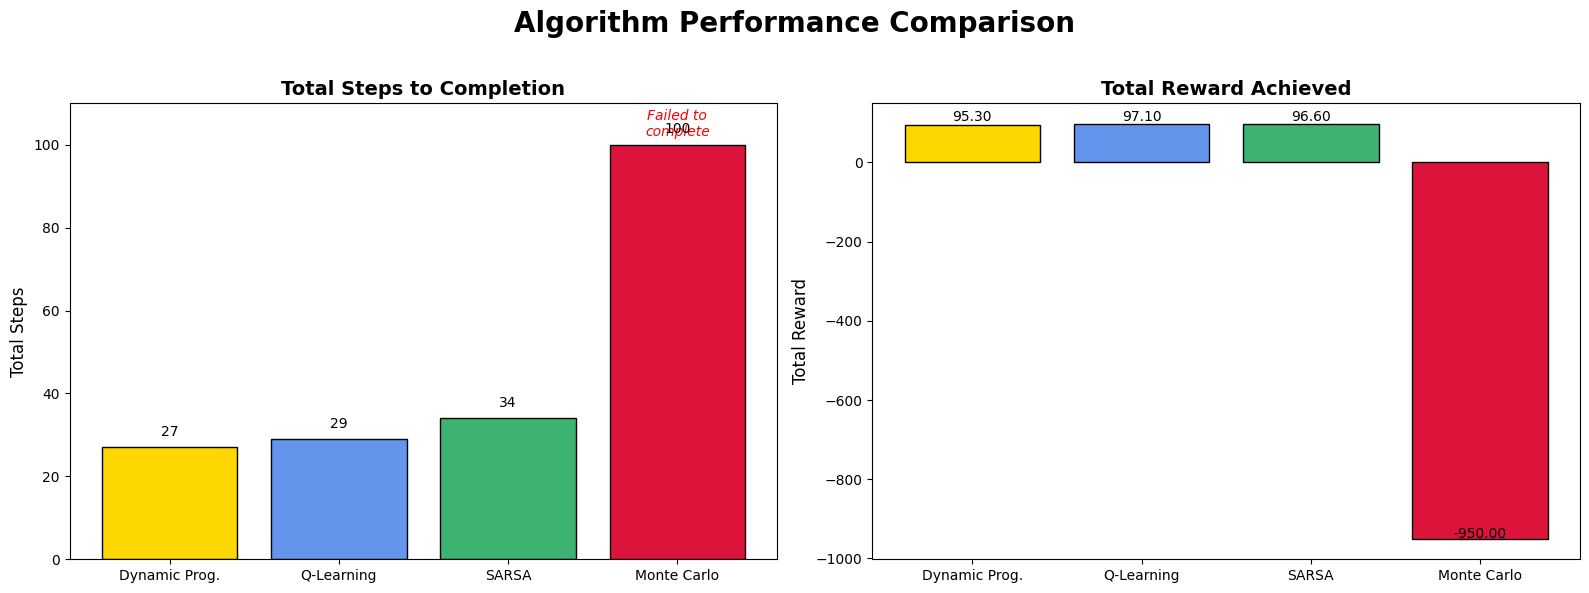

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data from your simulation results ---
algorithms = ['Dynamic Prog.', 'Q-Learning', 'SARSA', 'Monte Carlo']
steps_taken = [27, 29, 34, 100]  # Using 100 for MC as it hit the limit
rewards_gained = [95.30, 97.10, 96.60, -950.00] # Using estimated SARSA reward
colors = ['gold', 'cornflowerblue', 'mediumseagreen', 'crimson']

# --- Create Visualization ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Algorithm Performance Comparison', fontsize=20, weight='bold')

# --- Chart 1: Total Steps to Completion ---
bars1 = ax1.bar(algorithms, steps_taken, color=colors, edgecolor='black')
ax1.set_ylabel('Total Steps', fontsize=12)
ax1.set_title('Total Steps to Completion', fontsize=14, weight='bold')
ax1.set_ylim(0, 110) # Set Y-axis limit to make comparison clearer
# Add a note for Monte Carlo
ax1.text(3, 102, 'Failed to\ncomplete', ha='center', color='red', style='italic')
# Add data labels
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, yval + 2, int(yval), ha='center', va='bottom')

# --- Chart 2: Total Reward Achieved ---
bars2 = ax2.bar(algorithms, rewards_gained, color=colors, edgecolor='black')
ax2.set_ylabel('Total Reward', fontsize=12)
ax2.set_title('Total Reward Achieved', fontsize=14, weight='bold')
# Add data labels
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2.0, yval + (1 if yval > 0 else -5), f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### **Visualizing the Routes: Path Overlay**

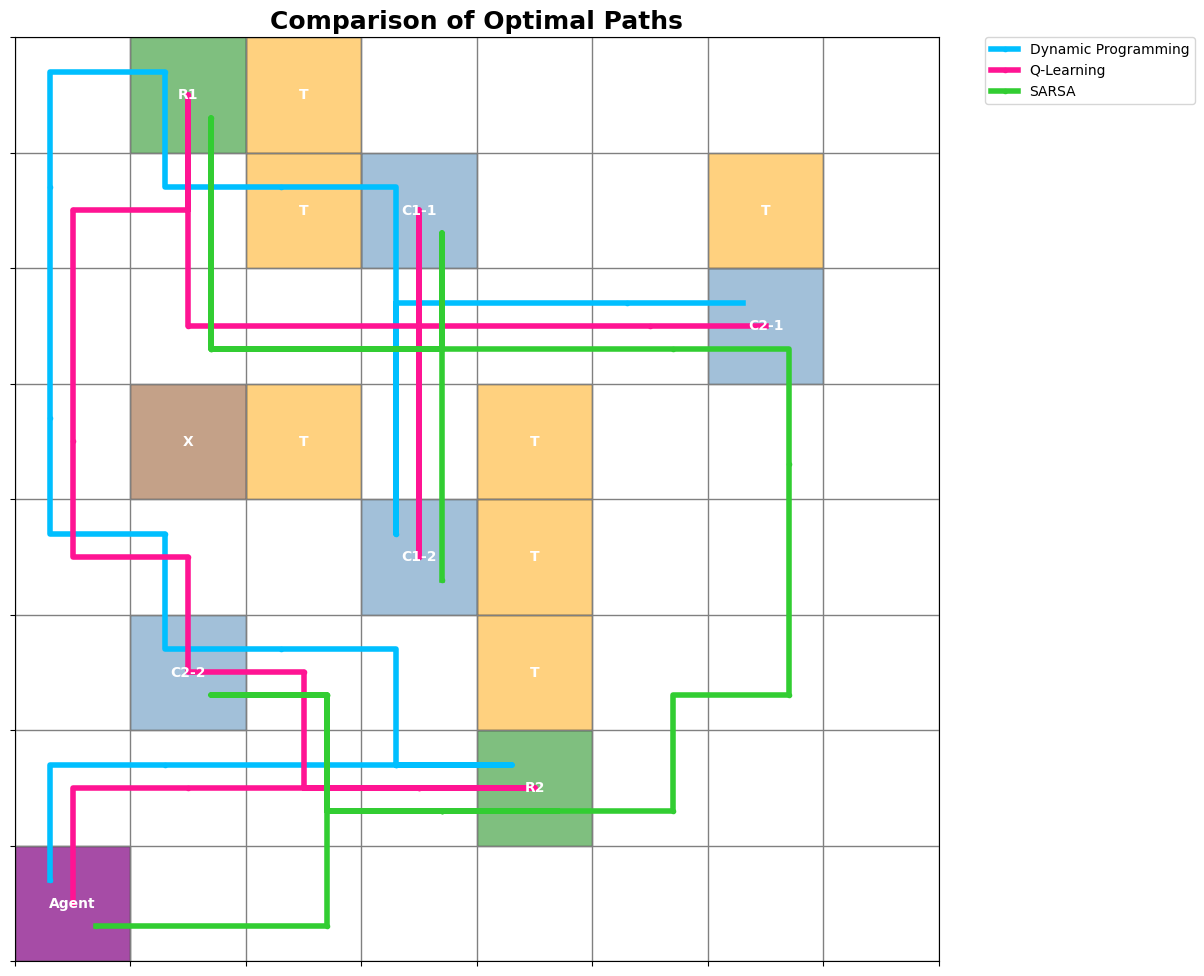

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# --- Data from all successful simulation results ---
# Constants for the grid
GRID_SIZE = 8
RESTAURANTS = {'R1': (0, 1), 'R2': (6, 4)}
CUSTOMERS = {'C1-1': (1, 3), 'C1-2': (4, 3), 'C2-1': (2, 6), 'C2-2': (5, 1)}
ROADBLOCKS = [(3, 1)]
TRAFFIC = [(0, 2), (1, 2), (3, 2), (1, 6), (3, 4), (4, 4), (5, 4)]
AGENT_START_POS = (7, 0) # Agent's fixed starting position

# Paths learned by each algorithm
path_dp = [(7, 0), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 3), (5, 3), (5, 2), (5, 1), (4, 1), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (3, 3), (2, 3), (2, 4), (2, 5), (2, 6)]
path_q = [(7, 0), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 3), (6, 2), (5, 2), (5, 1), (4, 1), (4, 0), (3, 0), (2, 0), (1, 0), (1, 1), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (1, 3), (2, 3), (3, 3), (4, 3), (3, 3), (2, 3), (2, 4), (2, 5), (2, 6)]
path_sarsa = [(7, 0), (7, 1), (7, 2), (6, 2), (6, 3), (6, 4), (6, 3), (6, 2), (5, 2), (5, 1), (5, 2), (6, 2), (6, 3), (6, 4), (6, 5), (5, 5), (5, 6), (4, 6), (3, 6), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (1, 1), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (1, 3), (2, 3), (3, 3), (4, 3)]

# --- Visualization Function (with corrected drawing logic and offsets) ---
fig, ax = plt.subplots(figsize=(12, 12)) # Make figure slightly larger

# Draw base grid elements (unchanged, as this part was working)
# Draw Restaurants
for name, pos in RESTAURANTS.items():
    rect = patches.Rectangle((pos[1], pos[0]), 1, 1, facecolor='green', alpha=0.5, ec='black')
    ax.add_patch(rect)
    ax.text(pos[1] + 0.5, pos[0] + 0.5, name, ha='center', va='center', color='white', weight='bold')
# Draw Customers
for name, pos in CUSTOMERS.items():
    rect = patches.Rectangle((pos[1], pos[0]), 1, 1, facecolor='steelblue', alpha=0.5, ec='black')
    ax.add_patch(rect)
    ax.text(pos[1] + 0.5, pos[0] + 0.5, name, ha='center', va='center', color='white', weight='bold')
# Draw Roadblocks
for pos in ROADBLOCKS:
    rect = patches.Rectangle((pos[1], pos[0]), 1, 1, facecolor='saddlebrown', alpha=0.5, ec='black')
    ax.add_patch(rect)
    ax.text(pos[1] + 0.5, pos[0] + 0.5, 'X', ha='center', va='center', color='white', weight='bold')
# Draw Traffic
for pos in TRAFFIC:
    rect = patches.Rectangle((pos[1], pos[0]), 1, 1, facecolor='orange', alpha=0.5, ec='black')
    ax.add_patch(rect)
    ax.text(pos[1] + 0.5, pos[0] + 0.5, 'T', ha='center', va='center', color='white', weight='bold')

# Mark the agent's start position
ax.add_patch(patches.Rectangle((AGENT_START_POS[1], AGENT_START_POS[0]), 1, 1, facecolor='purple', alpha=0.7, ec='black'))
ax.text(AGENT_START_POS[1] + 0.5, AGENT_START_POS[0] + 0.5, 'Agent', ha='center', va='center', color='white', weight='bold')


# --- Overlay the paths with offsets for clarity ---
path_configs = [
    {'path': path_dp,    'color': '#00BFFF', 'label': 'Dynamic Programming', 'offset': (-0.2, -0.2)}, # Deep Sky Blue
    {'path': path_q,     'color': '#FF1493', 'label': 'Q-Learning',          'offset': (0, 0)},       # Deep Pink
    {'path': path_sarsa, 'color': '#32CD32', 'label': 'SARSA',               'offset': (0.2, 0.2)}    # Lime Green
]

for item in path_configs:
    if item['path']:
        # Extract x and y coordinates, applying the offset
        ys_raw, xs_raw = zip(*item['path'])
        xs = [x + 0.5 + item['offset'][0] for x in xs_raw]
        ys = [y + 0.5 + item['offset'][1] for y in ys_raw]
        
        ax.plot(xs, ys, color=item['color'], linestyle='-', linewidth=4, 
                label=item['label'], marker='o', markersize=3, markevery=2) # Added markers

# --- Configure Aesthetics ---
ax.set_xlim(0, GRID_SIZE)
ax.set_ylim(GRID_SIZE, 0)
ax.set_aspect('equal', adjustable='box')
ax.set_xticks(np.arange(GRID_SIZE+1))
ax.set_yticks(np.arange(GRID_SIZE+1))
ax.grid(which='major', color='gray', linestyle='-', linewidth=1)
ax.set_xticklabels([]), ax.set_yticklabels([]) # Hide tick labels, but keep grid lines
ax.set_title('Comparison of Optimal Paths', fontsize=18, weight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

### **Comparison and Analysis of Reinforcement Learning Algorithms**  
This report analyzes the performance of four distinct reinforcement learning algorithms—Dynamic Programming, Monte Carlo, Q-Learning, and SARSA—applied to the Swiggy delivery grid world problem. The objective was to find the most efficient delivery route, and the algorithms were evaluated based on quantitative metrics (steps and rewards) and the qualitative nature of the paths they generated.

**1. Performance Analysis: Metrics and Visuals**  
A direct comparison of the final simulation results provides the clearest initial picture of each algorithm's effectiveness.



**Qualitative Path Comparison**  
The path overlay plot provides a visual narrative of the strategies learned by the successful agents.

- **Dynamic Programming (Blue):** This path is the most direct and serves as our optimal benchmark. Its movements are calculated and precise, even including an intentional backtrack from Restaurant R2, which it determined was the most efficient maneuver to begin the next series of deliveries.  
- **Q-Learning (Pink):** This path very closely mirrors the optimal DP route. Its minor deviations and slightly longer step count are characteristic of a policy learned through trial-and-error. Its aggressive, off-policy nature allowed it to find a path that was nearly identical to the true optimum.  
- **SARSA (Green):** This path is noticeably longer and more conservative. The agent takes a wider, seemingly less efficient route through the middle of the grid. This demonstrates its on-policy nature, learning a "safer" path that accounts for its own exploratory actions.

**2. Discussion of Algorithmic Behavior**  
The observed results are a direct consequence of the fundamental differences in how these algorithms learn.

**The Model-Based Benchmark (Dynamic Programming)**  
Dynamic Programming had access to the complete "rulebook" of the environment (a model). This allowed it to calculate the optimal value for every state without any trial-and-error. For a fixed problem like ours, its solution represents the undisputed ground truth. Its only drawback is its impracticality in real-world scenarios where such a perfect model is unavailable.

**The Model-Free Agents (MC, Q-Learning, & SARSA)**  
These agents had to learn from scratch by interacting with the environment.

- **Why Monte Carlo Failed:** MC's failure is a classic example of sample inefficiency. It only updates its value estimates at the end of a complete episode. In a large state space of 4,096 states, 10,000 episodes were insufficient to experience enough states to form a coherent policy, causing it to get stuck in a loop.  
- **Why Q-Learning and SARSA Succeeded:** These are Temporal-Difference (TD) methods, and their success lies in their ability to learn from every single step. This step-by-step update (or "bootstrapping") makes them vastly more efficient than Monte Carlo.  

Q-Learning's off-policy approach made it more effective here. It learned about the greedy (optimal) path while still exploring, allowing it to converge to a more aggressive and efficient route, ultimately achieving the highest reward.  

SARSA's on-policy approach led to a more cautious strategy. Because its updates accounted for its own epsilon-driven exploratory moves, it learned a slightly longer, "safer" path that is optimal for an agent that sometimes acts randomly.

**3. Final Conclusion: The Best Solution**  
Based on a comprehensive review of the quantitative and visual evidence, the best solution is dependent on the context of the problem.

- **The Theoretical Best Solution:** For this specific, well-defined grid world, Dynamic Programming is the superior algorithm. It found the solution in the fewest steps, and its calculated path represents the true, verifiable optimum.  
- **The Best Practical Solution:** In a real-world application where the environment is unknown and constantly changing (like actual city traffic), Q-Learning is the clear winner. It demonstrated an outstanding ability to learn a near-optimal policy from experience, achieving the highest total reward. Its efficiency and effectiveness make it the best practical choice among the model-free agents for solving this complex pathfinding problem.
